<h1>EDA</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ccv = "C:/Users/Abraham-MF/Downloads/muestra4s.csv"
ds = pd.read_csv(ccv)
print(ds.head(5))

       id   sensor1   sensor2   sensor3   sensor4
0  388937  0.332645  0.312709  0.066802  0.223234
1   90665  0.114415  0.010050  0.043108  0.222393
2   62420  0.089782  0.154589  0.101575  0.090151
3   20018  0.242456  0.101617  0.063159  0.158376
4   57736  0.130230  0.067402  0.066449  0.141199


In [9]:
print('Cantidad de Filas y columnas:',ds.shape)
print('Nombre columnas:',ds.columns)

Cantidad de Filas y columnas: (300, 5)
Nombre columnas: Index(['id', 'sensor1', 'sensor2', 'sensor3', 'sensor4'], dtype='object')


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       300 non-null    int64  
 1   sensor1  300 non-null    float64
 2   sensor2  300 non-null    float64
 3   sensor3  300 non-null    float64
 4   sensor4  300 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [11]:
ds.describe()

,id,sensor1,sensor2,sensor3,sensor4
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,195072.120000,0.203864,0.196685,0.198745,0.202088
std,133924.921824,0.130148,0.203096,0.218348,0.126481
min,14.000000,0.013153,0.004468,0.004946,0.005244
25%,68315.250000,0.107719,0.059639,0.043634,0.105538
50%,195907.500000,0.178133,0.138402,0.115086,0.182516
75%,341503.000000,0.281055,0.254938,0.253272,0.278511
max,396768.000000,0.718866,0.949300,0.962168,0.566642


C:\Users\Abraham-MF\AppData\Local\Temp\ipykernel_11104\2756284331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Abraham-MF\AppData\Local\Temp\ipykernel_11104\2756284331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Abraham-MF\AppData\Local\Temp\ipykernel_11104\2756284331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Abraham-MF\AppData\Local\Temp\ipykernel_11104\2756284331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xt

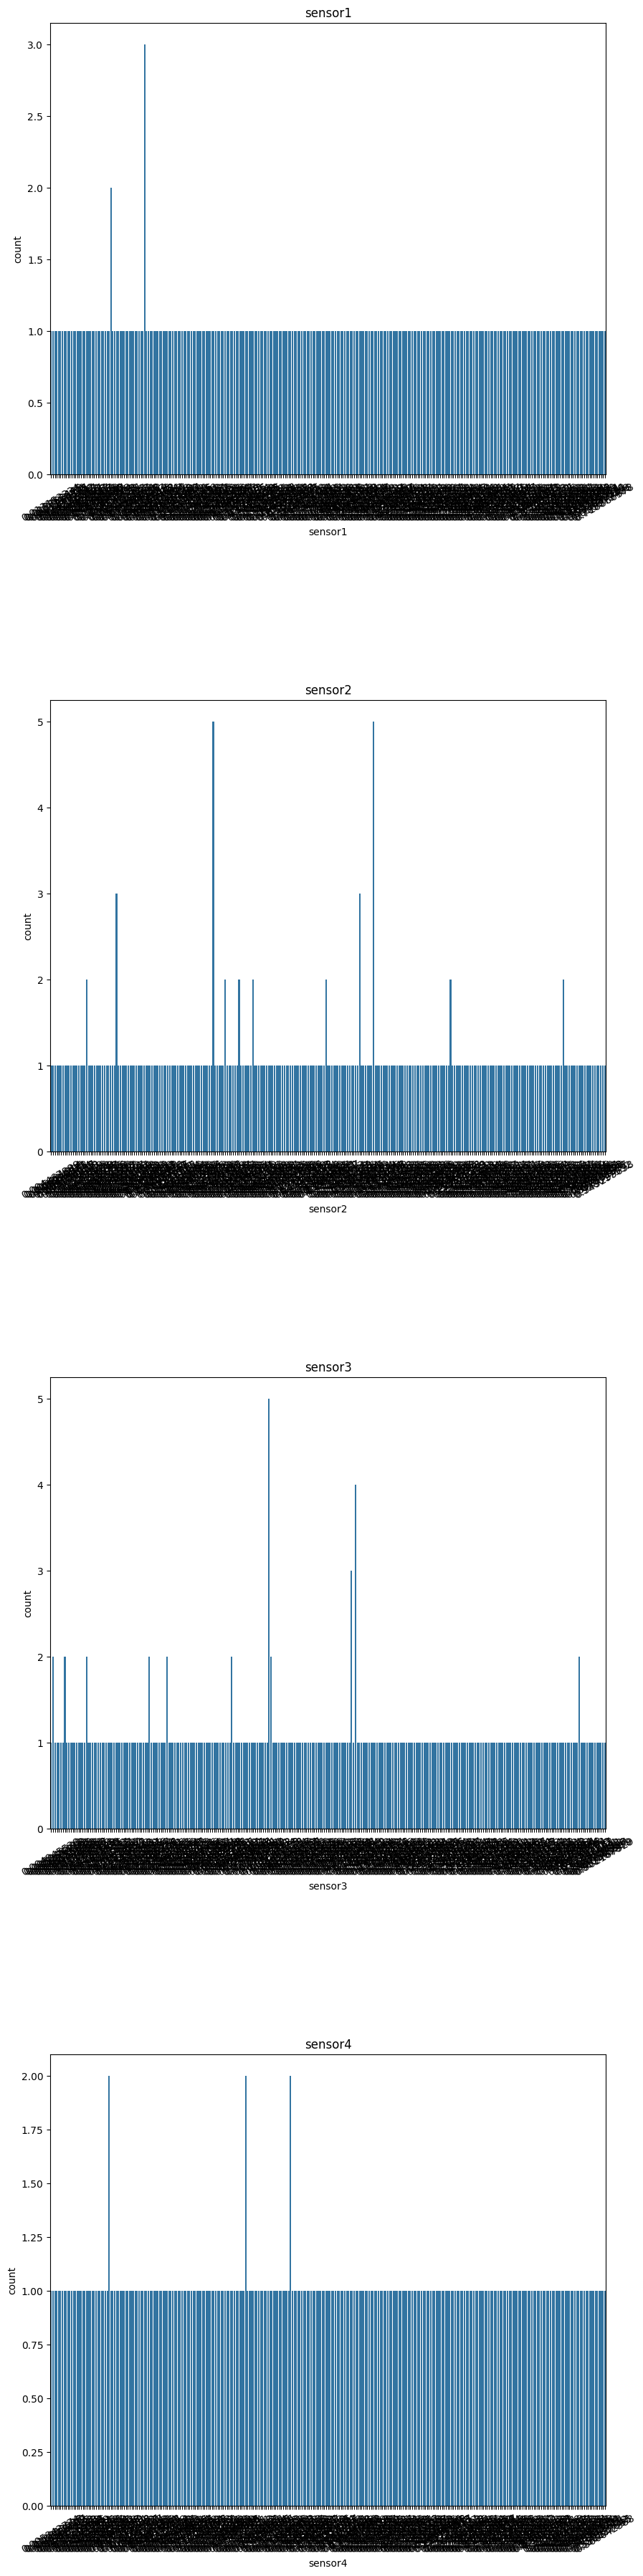

In [12]:
cat = ['sensor1', 'sensor2', 'sensor3', 'sensor4']

fig, ax = plt.subplots(nrows=len(cat), ncols =1, figsize =(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cat):
    sns.countplot(x=col, data=ds, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

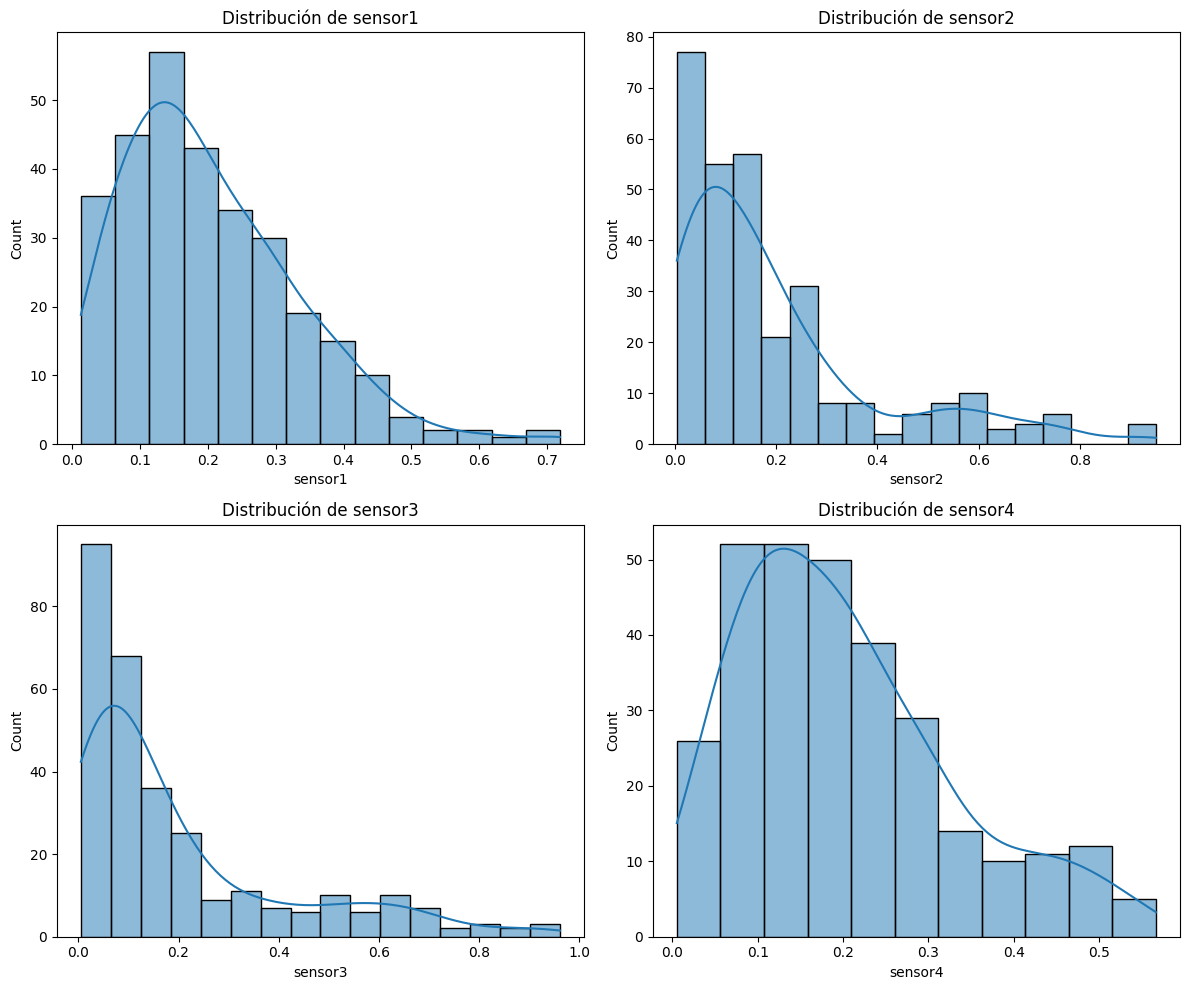

In [13]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(ds.columns[1:], 1):
    plt.subplot(2, 2, i)
    sns.histplot(ds[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

In [14]:
corrl = ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']].corr()
print("\nMatriz de correlación:")
print(corrl)


Matriz de correlación:
          sensor1   sensor2   sensor3   sensor4
sensor1  1.000000  0.631383  0.620275  0.509346
sensor2  0.631383  1.000000  0.866789  0.457014
sensor3  0.620275  0.866789  1.000000  0.540490
sensor4  0.509346  0.457014  0.540490  1.000000


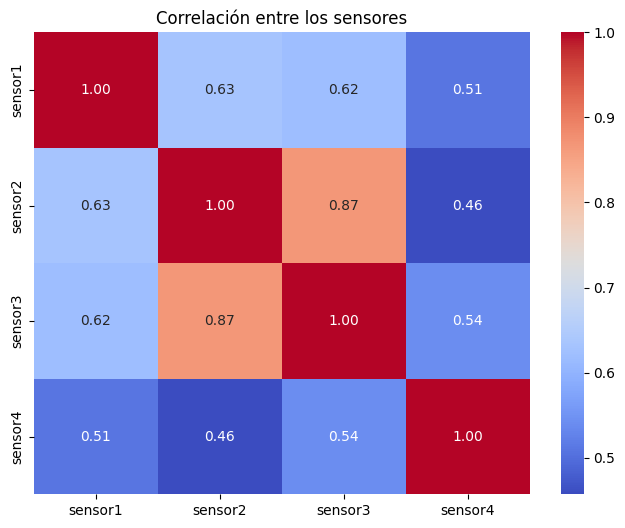

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrl, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlación entre los sensores")
plt.show()

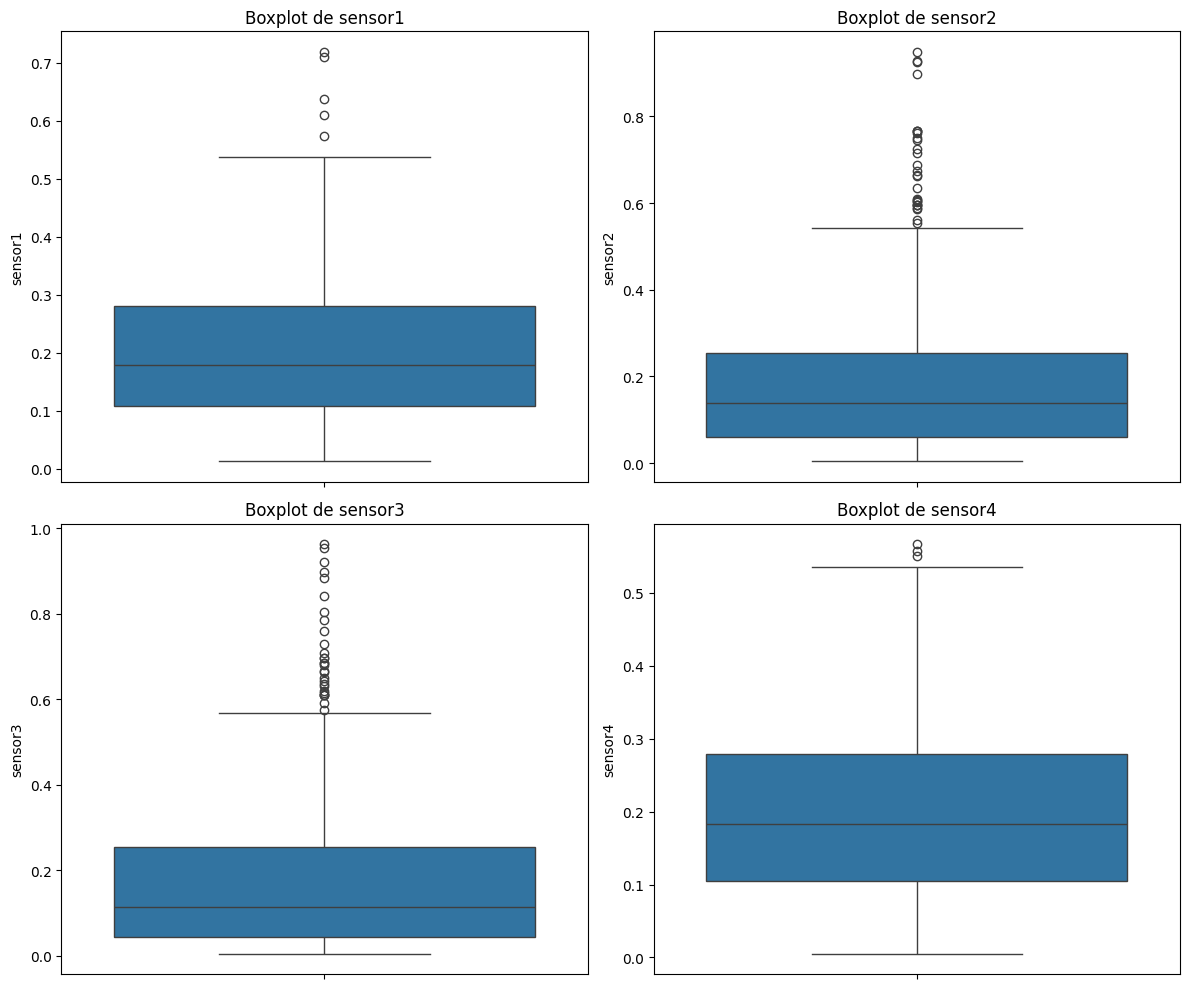

In [16]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(ds.columns[1:], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=ds[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [17]:
Q1 = ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']].quantile(0.25)
Q3 = ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']] < (Q1 - 1.5 * IQR)) | (ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']] > (Q3 + 1.5 * IQR)))
print("\nvalores atípicos")
print(outliers.sum())


valores atípicos
sensor1     5
sensor2    28
sensor3    29
sensor4     3
dtype: int64


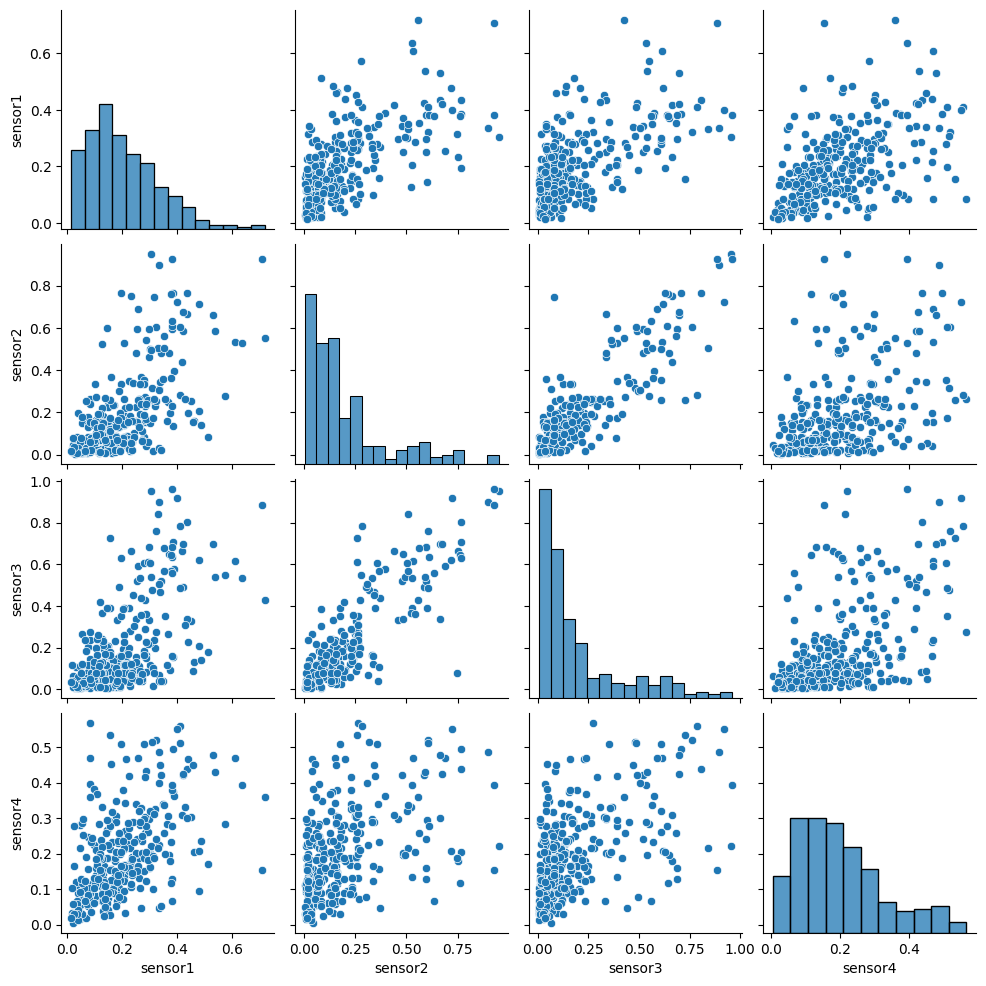

In [18]:
sns.pairplot(ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']])
plt.show()

In [19]:
import math

def Ramas_Hojas(data, dig=2):
    redon = [round(x, dig) for x in data]
    
    ramas = {}
    for num in redon:
        rama = int(num * 10)
        hoja = round(num - rama / 10, dig)
        if rama not in ramas:
            ramas[rama] = []
        ramas[rama].append(hoja)
    
    for rama in sorted(ramas.keys()):
        hojas = sorted(ramas[rama])
        hoja_str = ' '.join(str(hoja) for hoja in hojas)
        print(f"{rama}: {hoja_str}")


Ramas_Hojas(ds['sensor1'].values)

0: 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06 0.06 0.07 0.07 0.07 0.07 0.07 0.07 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.09 0.09 0.09 0.09 0.09 0.09 0.09
1: 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09
2: 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04

<h1>Transformacion de datos</h1>

In [6]:
from sklearn.preprocessing import StandardScaler
# Separar la columna 'id' de las características
ids = ds['id']
df_features = ds.drop('id', axis=1)

In [7]:
# 1. Aplicar Estandarización (StandardScaler)
# La estandarización es crucial para algoritmos basados en distancia como k-Means.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_features)

In [8]:
# Convertir el array de vuelta a DataFrame para facilitar el manejo
df_scaled = pd.DataFrame(data_scaled, columns=df_features.columns)

print("--- Primeras 5 filas de los datos escalados (StandardScaler) ---")
print(df_scaled.head())

--- Primeras 5 filas de los datos escalados (StandardScaler) ---
    sensor1   sensor2   sensor3   sensor4
0  0.991147  0.572233 -0.605285  0.167471
1 -0.688440 -0.920485 -0.713982  0.160808
2 -0.878027 -0.207617 -0.445763 -0.886485
3  0.297019 -0.468872 -0.621997 -0.346173
4 -0.566721 -0.637621 -0.606907 -0.482205


In [9]:
# Guardar los datos escalados para su uso posterior
df_scaled.to_csv('muestra4s_scaled.csv', index=False)
print("\nDatos escalados guardados en 'muestra4s_scaled.csv'")


Datos escalados guardados en 'muestra4s_scaled.csv'


<h1>Aprendizaje Automatico</h1>

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar los datos escalados
df_scaled = pd.read_csv('muestra4s_scaled.csv')
X = df_scaled.values

# Valores de k a probar
k_values = [3, 4, 5, 15]
results = {}

In [15]:
print("--- Implementación de k-Means y Evaluación con Silhouette Score ---")

for k in k_values:
    try:
        # Inicializar y entrenar el modelo k-Means
        # n_init='auto' es la configuración recomendada en versiones recientes de scikit-learn
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X)
        
        # Obtener las etiquetas de los clusters
        labels = kmeans.labels_
        
        # Calcular el Silhouette Score
        score = silhouette_score(X, labels)
        
        results[k] = score
        print(f"k={k}: Silhouette Score = {score:.4f}")
        
        # Guardar las etiquetas del mejor k (usaremos k=4 como ejemplo para el código)
        if k == 4:
            df_scaled['cluster_k4'] = labels
            df_scaled.to_csv('muestra4s_clustered_k4.csv', index=False)
            print("Etiquetas de cluster para k=4 guardadas en 'muestra4s_clustered_k4.csv'")
            
    except Exception as e:
        print(f"Error al ejecutar k-Means para k={k}: {e}")

--- Implementación de k-Means y Evaluación con Silhouette Score ---
k=3: Silhouette Score = 0.3384
k=4: Silhouette Score = 0.3148
Etiquetas de cluster para k=4 guardadas en 'muestra4s_clustered_k4.csv'
k=5: Silhouette Score = 0.2638
k=15: Silhouette Score = 0.2766


In [16]:
# Guardar los resultados en un archivo de texto
with open('kmeans_silhouette_results.txt', 'w') as f:
    f.write("Resultados de k-Means (Silhouette Score):\n")
    for k, score in results.items():
        f.write(f"k={k}: {score:.4f}\n")

print("\nResultados de Silhouette Score guardados en 'kmeans_silhouette_results.txt'")


Resultados de Silhouette Score guardados en 'kmeans_silhouette_results.txt'


<h3>reduccion de la dimencionalidad</h3>

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Cargar los datos escalados
df_scaled = pd.read_csv('muestra4s_scaled.csv')
X = df_scaled.values

# 1. Análisis de Componentes Principales (PCA)
print("--- Análisis de Componentes Principales (PCA) ---")
pca = PCA()
pca.fit(X)

--- Análisis de Componentes Principales (PCA) ---


,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [18]:
# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

Varianza explicada por cada componente:
PC1: 0.7077
PC2: 0.1529
PC3: 0.1079
PC4: 0.0315


In [19]:
# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza acumulada:")
for i, cum_ratio in enumerate(cumulative_variance):
    print(f"PC{i+1}: {cum_ratio:.4f}")


Varianza acumulada:
PC1: 0.7077
PC2: 0.8606
PC3: 0.9685
PC4: 1.0000


In [20]:
# Reducir a 2 componentes para visualización
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca.to_csv('muestra4s_pca_2d.csv', index=False)
print("\nDatos reducidos con PCA (2D) guardados en 'muestra4s_pca_2d.csv'")


Datos reducidos con PCA (2D) guardados en 'muestra4s_pca_2d.csv'


In [22]:
# 2. t-Distributed Stochastic Neighbor Embedding (t-SNE)
print("\n--- t-SNE para Visualización (2D) ---")
# Usaremos los clusters de k=3 (el mejor Silhouette Score) para colorear la visualización
df_clustered = pd.read_csv('muestra4s_clustered_k4.csv') # Usaremos k=4 para el ejemplo de visualización
clusters = df_clustered['cluster_k4']

# La ejecución de t-SNE puede ser lenta, se recomienda usar PCA como pre-procesamiento si el dataset es grande.
# Para este dataset pequeño, lo ejecutaremos directamente.
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = clusters
df_tsne.to_csv('muestra4s_tsne_2d.csv', index=False)
print("Datos reducidos con t-SNE (2D) y clusters guardados en 'muestra4s_tsne_2d.csv'")


--- t-SNE para Visualización (2D) ---
Datos reducidos con t-SNE (2D) y clusters guardados en 'muestra4s_tsne_2d.csv'


Gráfico de t-SNE guardado en 'tsne_visualization.png'


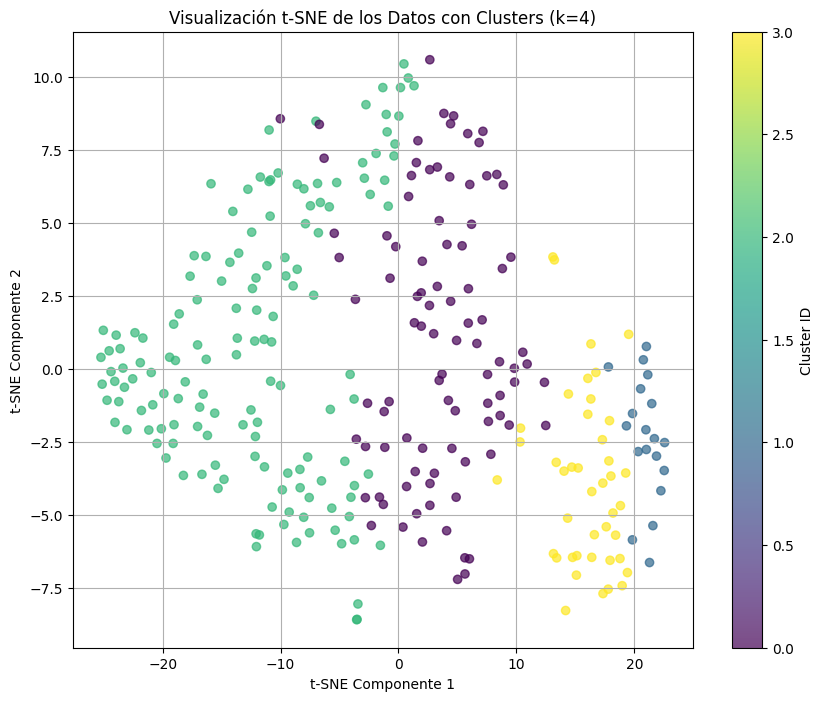

In [23]:
# 3. Generar un gráfico de t-SNE con los clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Visualización t-SNE de los Datos con Clusters (k=4)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.savefig('tsne_visualization.png')
print("Gráfico de t-SNE guardado en 'tsne_visualization.png'")